# GetBiologicalData

Gets required additional biological data from BioCyc for Arabidopsis thaliana

Assumes BioCyc pathway-tools is running locally and appropriate PGDB has been imported

./pathway-tools -lisp -python-local-only

Uses the pythoncyc package to access pathway-tools

Import pythoncyc

In [1]:
import pythoncyc

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Connect to pathway-tools and specify species

In [9]:
ara = pythoncyc.select_organism('ara')

Load time-series data file

In [151]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-SOM.csv")

In [152]:
arr_data_pd.head(5)

,BioCyC Name,Metabolite,0.5,1,2,4,12,24,48,72
0,PYRUVATE,Pyruvate,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,LACTATE,Lactate,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,ETHANOL-AMINE,Ethanolamine,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,GLYCEROL,Glycerol,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,SUC,Succinate,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


Extract first column of BioCyC metabolite names

In [153]:
compounds = arr_data_pd["BioCyC Name"].tolist()
compounds

['PYRUVATE',
 'LACTATE',
 'ETHANOL-AMINE',
 'GLYCEROL',
 'SUC',
 'GLYCERATE',
 'FUM',
 'CADAVERINE',
 'MAL',
 '4-AMINO-BUTYRATE',
 'CYS',
 '2-KETOGLUTARATE',
 'CIS-ACONITATE',
 'PUTRESCINE',
 'SHIKIMATE',
 'CIT',
 'FRU',
 'GLUCOSE',
 'LYS',
 'TYR',
 'GLUCONATE',
 'CPD0-1083',
 'URATE',
 'SUCROSE',
 'TREHALOSE',
 'L-ASPARTATE',
 'ASN',
 'SER',
 'GLY',
 'L-ALPHA-ALANINE',
 'GLT',
 'GLN',
 'THR',
 'PRO',
 'VAL',
 'TRP',
 'ILE',
 'LEU',
 'PHE',
 'FORMATE',
 'FOLATES']

Create empty numpy array for common pathways and common enzymes

In [209]:
rows, cols = (len(compounds), len(compounds))
common_pathways = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_enzymes = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_genes = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_reactions = pd.DataFrame(np.zeros((rows, cols)), dtype = int)

Calculate common pathways between every pair of compounds

No data for lactate or glucose so create exceptions

Use sets so easier to find intersection (common paths)

In [197]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_pathways[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_pathways[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_pathways[row][column] = 0
            continue
        row_paths = set(ara.pathways_of_compound(compounds[row]))
        col_paths = set(ara.pathways_of_compound(compounds[column]))
        common_paths = row_paths.intersection(col_paths)
        common_pathways[row][column] = len(common_paths)
common_pathways.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


### Add metabolites as column and row identifiers

In [198]:
common_pathways.set_axis(compounds, axis=1, inplace=True)
common_pathways.set_axis([compounds], axis=0, inplace=True)
common_pathways.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
PYRUVATE,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
LACTATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETHANOL-AMINE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLYCEROL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUC,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


Write common pathways to a file

In [188]:
common_pathways.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv", sep=",")

Plot distribution of number of common pathways

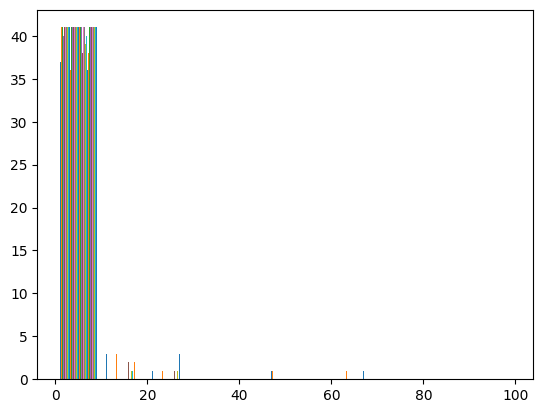

In [189]:
plt.hist(common_pathways, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Calculate common enzymes between every pair of compounds

In [199]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_enzymes[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_enzymes[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_enzymes[row][column] = 0
            continue
        total_row_ezys = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_ezys = ara.enzymes_of_pathway(path)
            for ezy in row_ezys:
                if ezy not in total_row_ezys:
                    total_row_ezys.add(ezy)
        total_col_ezys = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_ezys = ara.enzymes_of_pathway(path)
            for ezy in col_ezys:
                if ezy not in total_col_ezys:
                    total_col_ezys.add(ezy)
        common_enzymes[row][column] = len(total_row_ezys.intersection(total_col_ezys))
common_enzymes.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,128,15,116,0,145,11,...,109,60,2,20,87,38,20,68,27,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,0,0,0,0,1,368,3,123,11,...,15,3,0,1,1,0,1,26,3,0


### Add metabolites as column and row identifiers

In [200]:
common_enzymes.set_axis(compounds, axis=1, inplace=True)
common_enzymes.set_axis([compounds], axis=0, inplace=True)
common_enzymes.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
PYRUVATE,0,0,0,0,128,15,116,0,145,11,...,109,60,2,20,87,38,20,68,27,0
LACTATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETHANOL-AMINE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLYCEROL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUC,128,0,0,0,0,1,368,3,123,11,...,15,3,0,1,1,0,1,26,3,0


Write common enzymes to a file

In [193]:
common_enzymes.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Enzymes.csv", sep=",")

Plot distribution of number of common enzymes

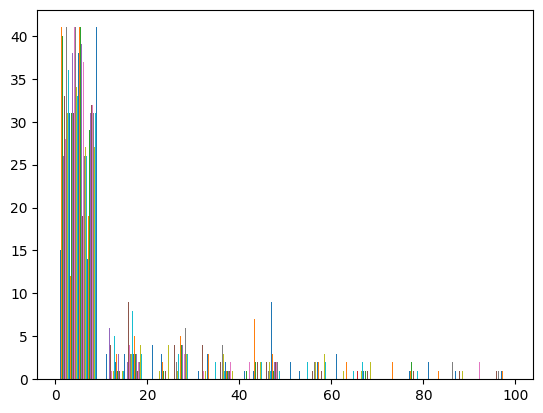

In [201]:
plt.hist(common_enzymes, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Calculate common genes between every pair of compounds

In [194]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_genes[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_genes[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_genes[row][column] = 0
            continue
        total_row_genes = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_genes = ara.genes_of_pathway(path)
            for ezy in row_ezys:
                if ezy not in total_row_genes:
                    total_row_genes.add(ezy)
        total_col_genes = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_genes = ara.genes_of_pathway(path)
            for ezy in col_genes:
                if ezy not in total_col_genes:
                    total_col_genes.add(ezy)
        #print(total_row_genes.intersection(total_col_genes))
        common_genes[row][column] = len(total_row_genes.intersection(total_col_genes))
common_genes.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DISCUSS WITH ALEXEY

I wonder if this is an artefact of the way the data was created ... mapped genes to proteins with no overlap?


Calculate common reactions between every pair of compounds

In [210]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    print("row = ", row)
    for column in range(0, cols):
        print("\tcolumn ", column)
        if (row == column):
            common_reactions[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_reactions[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_reactions[row][column] = 0
            continue
        total_row_reactions = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_enzymes = ara.enzymes_of_pathway(path)
            for ezy in row_enzymes:
                row_reactions = ara.reactions_of_enzyme(ezy)
                for react in row_reactions:
                    if react not in total_row_reactions:
                        total_row_reactions.add(react)
        total_col_reactions = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_enzymes = ara.enzymes_of_pathway(path)
            for ezy in col_enzymes:
                col_reactions = ara.reactions_of_enzyme(ezy)
                for react in col_reactions:
                    if react not in total_col_reactions:
                        total_col_reactions.add(react)
        common_reactions[row][column] = len(total_row_reactions.intersection(total_col_reactions))
common_genes.head(5)

row =  0
	column  0
	column  1
	column  2
	column  3
	column  4
	column  5
	column  6
	column  7
	column  8
	column  9
	column  10
	column  11
	column  12
	column  13
	column  14
	column  15
	column  16
	column  17
	column  18
	column  19
	column  20
	column  21
	column  22
	column  23
	column  24
	column  25
	column  26
	column  27
	column  28
	column  29
	column  30
	column  31
	column  32
	column  33
	column  34
	column  35
	column  36
	column  37
	column  38
	column  39
	column  40
row =  1
	column  0
	column  1
	column  2
	column  3
	column  4
	column  5
	column  6
	column  7
	column  8
	column  9
	column  10
	column  11
	column  12
	column  13
	column  14
	column  15
	column  16
	column  17
	column  18
	column  19
	column  20
	column  21
	column  22
	column  23
	column  24
	column  25
	column  26
	column  27
	column  28
	column  29
	column  30
	column  31
	column  32
	column  33
	column  34
	column  35
	column  36
	column  37
	column  38
	column  39
	column  40
row =  2
	column  

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
common_reactions

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,74,21,62,0,79,11,...,60,60,3,25,82,34,25,94,27,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,74,0,0,0,0,6,91,2,75,11,...,11,10,0,5,7,1,5,39,3,0
5,21,0,0,0,6,0,2,0,8,5,...,0,8,0,0,1,0,0,1,6,0
6,62,0,0,0,91,2,0,0,79,0,...,90,5,44,1,7,5,1,20,20,0
7,0,0,0,0,2,0,0,0,0,0,...,2,0,0,0,0,0,0,0,2,0
8,79,0,0,0,75,8,79,0,0,0,...,11,4,0,1,2,5,1,18,1,0
9,11,0,0,0,11,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
common_reactions.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Reactions.csv", sep=",")

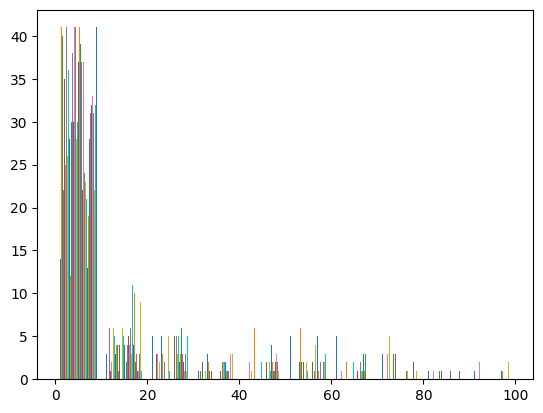

In [212]:
plt.hist(common_reactions, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

In [42]:
test = ara.pathways_of_compound('TRP')
print(test)
print(test[0])
hello = ara.compounds_of_pathway('TRPSYN-PWY')
print(hello)
one = ara.genes_of_pathway('TRPSYN-PWY')
print(one)
two = ara.enzymes_of_gene('AT5G17990')
print(two)
three = ara.binding_sites_affecting_gene('AT5G17990')
print(three)
four = ara.chromosome_of_gene('AT5G17990')
print(four)
five = ara.cotranscribed_genes('AT5G17990')
print(five)
six = ara.genes_in_same_operon('AT5G17990')
print(six)
seven = ara.genes_of_reaction('AT5G17990-MONOMER')
print(seven)
eight = ara.genes_regulated_by_gene('AT5G17990')
print(eight)
nine = ara.neighboring_genes_p('AT2G04400', 'AT5G48220', 10000000)
print(nine)
ten = ara.next_gene_on_replicon('AT5G48220')
print(ten)
eleven = ara.operon_of_gene('AT5G48220')
print(eleven)
twelve = ara.pathway_components('TRPSYN-PWY')
print(twelve)
thirteen = ara.reactions_of_gene('AT5G17990')
print(thirteen)
fourteen = ara.substrates_of_pathway('TRPSYN-PWY')
print(fourteen)
fifteen = ara.transcription_unit_genes('AT5G17990')
print(fifteen)

['|TRPSYN-PWY|', '|COMPLETE-ARO-ARA-PWY|', '|PWY-6030|', '|PWY-8024|', '|CAMALEXIN-SYN|', '|PWY-601|', '|PWY-3181|', '|PWYDQC-4|', '|PWY-581|']
|TRPSYN-PWY|
['|CARBON-DIOXIDE|', '|CARBOXYPHENYLAMINO-DEOXYRIBULOSE-P|', '|PRPP|', '|N-5-PHOSPHORIBOSYL-ANTHRANILATE|', '|PPI|', '|PYRUVATE|', '|GLT|', '|ANTHRANILATE|', '|PROTON|', '|CHORISMATE|', '|GLN|', '|GAP|', '|INDOLE-3-GLYCEROL-P|', '|WATER|', '|TRP|', '|INDOLE|', '|SER|']
['|AT2G04400|', '|AT5G48220|', '|AT1G07780|', '|AT1G29410|', '|AT5G05590|', '|PAI4|', '|AT5G17990|', '|AT1G25220|', '|AT2G29690|', '|AT5G05730|', '|AT5G57890|', '|AT1G24909|', '|AT1G25083|', '|AT1G24807|', '|AT1G25155|', '|AT3G55870|', '|AT1G70570|', '|AT3G54640|', '|AT4G27070|', '|AT4G02610|', '|AT5G54810|', '|AT5G28237|', '|AT5G38530|']
['|AT5G17990-MONOMER|']
[]
|CHROMOSOME-5|
[]
[]
[]
[]
False
None
[]
[[['|RXN0-2382|', '|RXN0-2381|', '|IGPSYN-RXN|', '|PRAISOM-RXN|', '|PRTRANS-RXN|', '|ANTHRANSYN-RXN|']], 1, 6, 6]
['|PRTRANS-RXN|']
[['|CARBOXYPHENYLAMINO-DEOXYRIBU

In [49]:
ara['AT5G17990']


accession_1,AT5G17990
centisome_position,22.069702
common_name,AT5G17990
component_of,['|CHROMOSOME-5-2|']
creation_date,3308598590
creator,|peifenz|
dblinks,"{'|TAIR|': ['AT5G17990', None, '|pzhang|', 3739906189, None, None]}"
frameid,|AT5G17990|
instance_name_template,G-*
key_slots,|COMMON-NAME|
left_end_position,5957215
